In [ ]:
!git clone https://github.com/octavio-navarro/DL_Data_sets

Cloning into 'DL_Data_sets'...
remote: Enumerating objects: 10080, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 10080 (delta 1), reused 69 (delta 0), pack-reused 10010
Receiving objects: 100% (10080/10080), 233.94 MiB | 42.93 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (10072/10072), done.


In [ ]:
!ls
!ls DL_Data_sets/Dogs_vs_cats/training_set/cats/
!ls

DL_Data_sets  sample_data
cat.1000.jpg  cat.1721.jpg  cat.2441.jpg  cat.3161.jpg	cat.3882.jpg
cat.1001.jpg  cat.1722.jpg  cat.2442.jpg  cat.3162.jpg	cat.3883.jpg
cat.1002.jpg  cat.1723.jpg  cat.2443.jpg  cat.3163.jpg	cat.3884.jpg
cat.1003.jpg  cat.1724.jpg  cat.2444.jpg  cat.3164.jpg	cat.3885.jpg
cat.1004.jpg  cat.1725.jpg  cat.2445.jpg  cat.3165.jpg	cat.3886.jpg
cat.1005.jpg  cat.1726.jpg  cat.2446.jpg  cat.3166.jpg	cat.3887.jpg
cat.1006.jpg  cat.1727.jpg  cat.2447.jpg  cat.3167.jpg	cat.3888.jpg
cat.1007.jpg  cat.1728.jpg  cat.2448.jpg  cat.3168.jpg	cat.3889.jpg
cat.1008.jpg  cat.1729.jpg  cat.2449.jpg  cat.3169.jpg	cat.388.jpg
cat.1009.jpg  cat.172.jpg   cat.244.jpg   cat.316.jpg	cat.3890.jpg
cat.100.jpg   cat.1730.jpg  cat.2450.jpg  cat.3170.jpg	cat.3891.jpg
cat.1010.jpg  cat.1731.jpg  cat.2451.jpg  cat.3171.jpg	cat.3892.jpg
cat.1011.jpg  cat.1732.jpg  cat.2452.jpg  cat.3172.jpg	cat.3893.jpg
cat.1012.jpg  cat.1733.jpg  cat.2453.jpg  cat.3173.jpg	cat.3894.jpg
cat.1013.jpg  cat.1734.j

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import cv2

from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def infinite():
  num = 1
  while True:
    yield num
    num += 1

# for i in infinite():
#   print(i)
#   if i % 10 == 0:
#     break

gen = infinite()

print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))

1
2
3
4
5


(397, 499, 3)


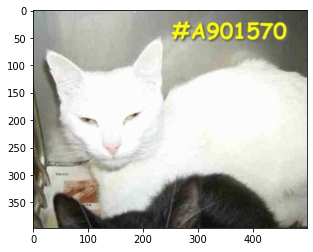

In [ ]:
cat_image = cv2.imread('DL_Data_sets/Dogs_vs_cats/training_set/cats/cat.2446.jpg')
cat_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB)

print(cat_image.shape)
plt.imshow(cat_image)

In [ ]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)

test_data_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_data_gen.flow_from_directory(
    'DL_Data_sets/Dogs_vs_cats/training_set',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training'
)

validation_generator = train_data_gen.flow_from_directory(
    'DL_Data_sets/Dogs_vs_cats/training_set',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)

test_generator = test_data_gen.flow_from_directory(
    'DL_Data_sets/Dogs_vs_cats/test_set',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(64, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Flatten())

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

network.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
history = network.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator,
    steps_per_epoch = 100, #train_generator.samples // 20,
    validation_steps = 50 #validation_generator.samples // 20
)

Epoch 1/30
100/100 [==============================] - 10s 93ms/step - loss: 0.6884 - accuracy: 0.5320 - val_loss: 0.6995 - val_accuracy: 0.5240
Epoch 2/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6565 - accuracy: 0.6090 - val_loss: 0.6378 - val_accuracy: 0.6340
Epoch 3/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6238 - accuracy: 0.6535 - val_loss: 0.6132 - val_accuracy: 0.6630
Epoch 4/30
100/100 [==============================] - 9s 89ms/step - loss: 0.6042 - accuracy: 0.6645 - val_loss: 0.6368 - val_accuracy: 0.6240
Epoch 5/30
100/100 [==============================] - 9s 95ms/step - loss: 0.5797 - accuracy: 0.6995 - val_loss: 0.6054 - val_accuracy: 0.6810
Epoch 6/30
100/100 [==============================] - 10s 95ms/step - loss: 0.5603 - accuracy: 0.7140 - val_loss: 0.6419 - val_accuracy: 0.6410
Epoch 7/30
100/100 [==============================] - 9s 94ms/step - loss: 0.5426 - accuracy: 0.7185 - val_loss: 0.6054 - val_accuracy: 0.66

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

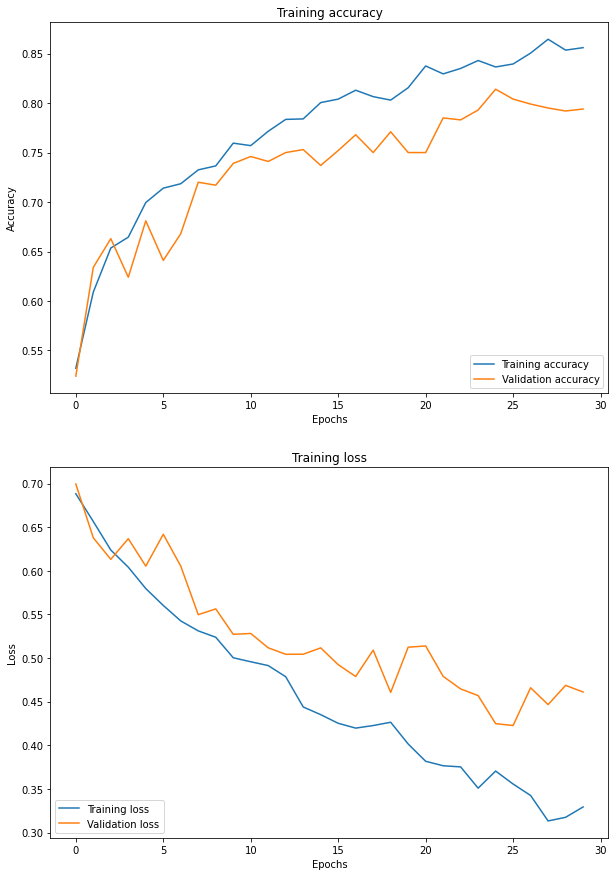

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')

## Data augmentation
---

In [ ]:
def gray_scale(image):
  '''
  image is rgb
  '''
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

In [ ]:
augmented_data_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.2,
    preprocessing_function = gray_scale
)

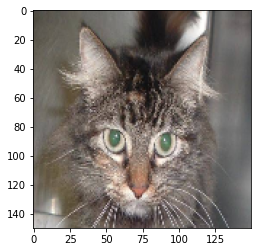

In [ ]:
data_test_dir = 'DL_Data_sets/Dogs_vs_cats/training_set/cats/'
img_path = data_test_dir + 'cat.3141.jpg'

cat_image = cv2.imread(img_path)
cat_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB)
cat_image = cv2.resize(cat_image, dsize=(150, 150))

plt.imshow(cat_image)

(1, 150, 150, 3)


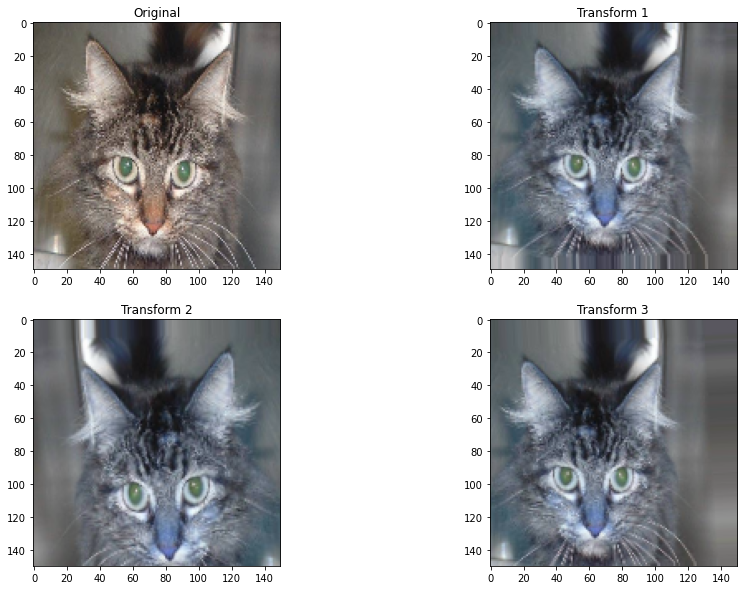

In [ ]:
cat_tensor = np.reshape(cat_image, (1, 150, 150, 3))
print(cat_tensor.shape)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.title('Original')
plt.imshow(cat_image)

idx = 1
for batch in augmented_data_gen.flow(cat_tensor, batch_size=1):
  plt.subplot(4, 5, idx+1)
  plt.title(f'Transform {idx}')
  plt.imshow(batch[0])
  idx += 1

  if idx % 4 == 0:
    break

plt.show()

In [ ]:
network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(64, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Conv2D(128, (3,3), activation='relu'))
network.add(layers.MaxPooling2D((2,2)))

network.add(layers.Flatten())

network.add(layers.Dropout(0.5))

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

network.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
train_generator = augmented_data_gen.flow_from_directory(
    'DL_Data_sets/Dogs_vs_cats/training_set',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training'
)

validation_generator = augmented_data_gen.flow_from_directory(
    'DL_Data_sets/Dogs_vs_cats/training_set',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation'
)

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:
history = network.fit(
    train_generator,
    epochs=30,
    validation_data = validation_generator,
    steps_per_epoch = 100, #train_generator.samples // 20,
    validation_steps = 50 #validation_generator.samples // 20
)

Epoch 1/30
100/100 [==============================] - 24s 231ms/step - loss: 0.6930 - accuracy: 0.5245 - val_loss: 0.6854 - val_accuracy: 0.5380
Epoch 2/30
100/100 [==============================] - 23s 231ms/step - loss: 0.6845 - accuracy: 0.5415 - val_loss: 0.6825 - val_accuracy: 0.5490
Epoch 3/30
100/100 [==============================] - 23s 232ms/step - loss: 0.6707 - accuracy: 0.5910 - val_loss: 0.6516 - val_accuracy: 0.6360
Epoch 4/30
100/100 [==============================] - 23s 226ms/step - loss: 0.6582 - accuracy: 0.6040 - val_loss: 0.6484 - val_accuracy: 0.6090
Epoch 5/30
100/100 [==============================] - 23s 231ms/step - loss: 0.6412 - accuracy: 0.6255 - val_loss: 0.6365 - val_accuracy: 0.6330
Epoch 6/30
100/100 [==============================] - 22s 221ms/step - loss: 0.6265 - accuracy: 0.6455 - val_loss: 0.6439 - val_accuracy: 0.6130
Epoch 7/30
100/100 [==============================] - 22s 222ms/step - loss: 0.6122 - accuracy: 0.6655 - val_loss: 0.5998 - val_ac

In [ ]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = [] 
  for point in points: 
    if smoothed_points: 
      previous = smoothed_points[-1] 
      smoothed_points.append(previous * factor + point * (1 - factor)) 
    else: 
      smoothed_points.append(point) 
  
  return smoothed_points 

In [ ]:
history_dict = history.history

loss_values = smooth_curve(history_dict['loss'])
val_loss_values = smooth_curve(history_dict['val_loss'])

acc_values = smooth_curve(history_dict['accuracy'])
val_acc_values = smooth_curve(history_dict['val_accuracy'])

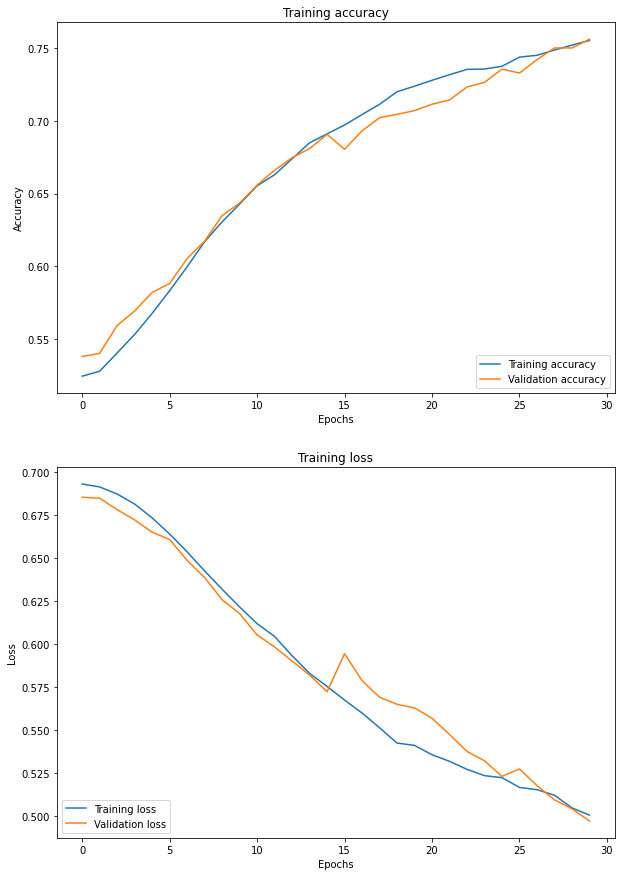

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].plot(acc_values, label="Training accuracy")
ax[0].plot(val_acc_values, label="Validation accuracy")
ax[0].set_title("Training accuracy")
ax[0].legend(loc='lower right')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].plot(loss_values, label="Training loss")
ax[1].plot(val_loss_values, label="Validation loss")
ax[1].set_title("Training loss")
ax[1].legend(loc='lower left')